In [16]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv("data/stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.drop(['id'],axis=1,inplace = True)

In [10]:
df.drop_duplicates(inplace=True)

In [19]:
df.drop_duplicates(inplace=True)

In [11]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
df.fillna(df['bmi'].median(),inplace = True)

In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

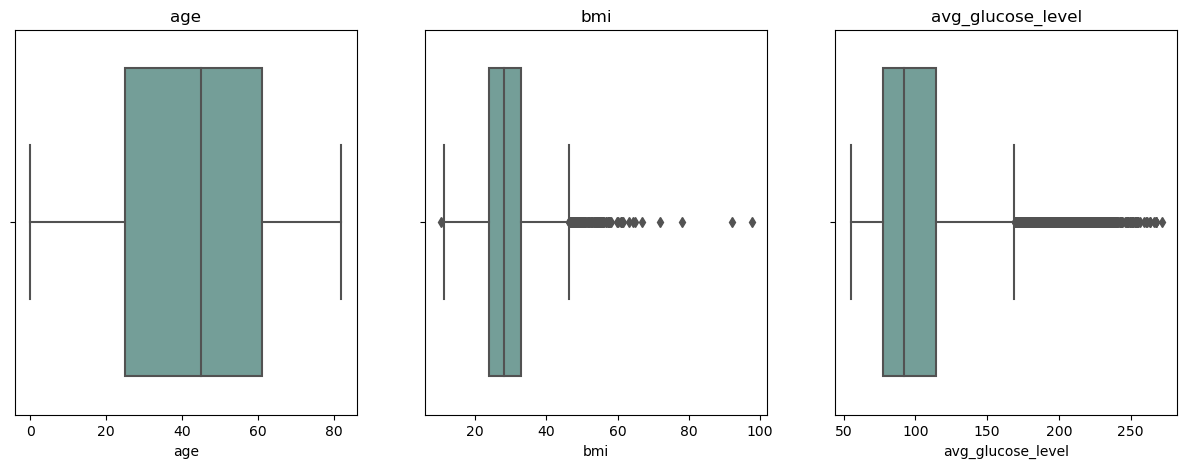

In [17]:
num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    
    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [18]:
# We will detect outliers value here using IQR method
def detect_outliers(data,column):
    q1 = df[column].quantile(.25)
    q3= df[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = df.index[(df[column] <lower_bound) | (df[column] > upper_bound)]
    
    return ls

In [20]:
index_list = []

for column in num_cols:
    index_list.extend(detect_outliers(df,column))

# remove duplicated indices in the index_list and sort it 
index_list = sorted(set(index_list))

In [21]:
print(index_list)

[0, 1, 3, 4, 5, 13, 14, 16, 17, 19, 20, 21, 22, 23, 27, 28, 29, 30, 32, 33, 36, 44, 45, 54, 55, 57, 58, 59, 60, 66, 71, 73, 76, 90, 95, 97, 101, 102, 107, 113, 115, 122, 123, 124, 128, 130, 132, 134, 135, 137, 138, 139, 144, 149, 150, 151, 155, 157, 158, 163, 175, 179, 187, 189, 190, 193, 195, 196, 201, 212, 215, 217, 218, 219, 220, 222, 225, 226, 233, 234, 235, 241, 242, 243, 254, 256, 258, 270, 272, 277, 278, 293, 298, 303, 307, 314, 318, 325, 326, 330, 331, 332, 333, 337, 341, 343, 350, 355, 358, 360, 365, 368, 386, 396, 399, 411, 415, 417, 426, 429, 430, 433, 436, 444, 456, 462, 466, 467, 468, 477, 479, 492, 493, 515, 539, 544, 549, 551, 552, 559, 563, 570, 576, 581, 583, 585, 595, 598, 599, 610, 616, 620, 622, 637, 642, 662, 672, 706, 708, 715, 719, 744, 746, 755, 761, 762, 770, 785, 805, 816, 846, 848, 851, 860, 865, 867, 880, 887, 894, 923, 928, 929, 930, 946, 948, 970, 971, 1003, 1011, 1059, 1061, 1067, 1070, 1071, 1077, 1092, 1097, 1102, 1104, 1113, 1118, 1131, 1158, 1166, 117

In [22]:
before_remove = df.shape

df =df.drop(index_list)
after_remove = df.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (5110, 11)
Shape of data after remove : (4391, 11)


In [23]:
df['stroke'].value_counts()

stroke
0    4226
1     165
Name: count, dtype: int64

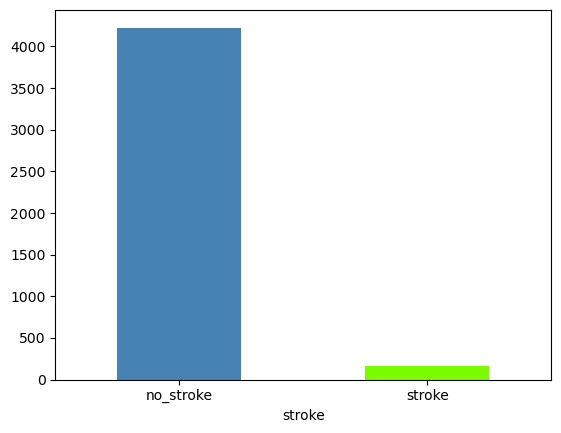

In [26]:
# Let's put this in a plot
st_plot = df["stroke"].value_counts().plot(kind="bar",color=["steelblue","lawngreen"], rot=0)
plt.xticks(ticks=[1,0], labels=["stroke", "no_stroke"]);

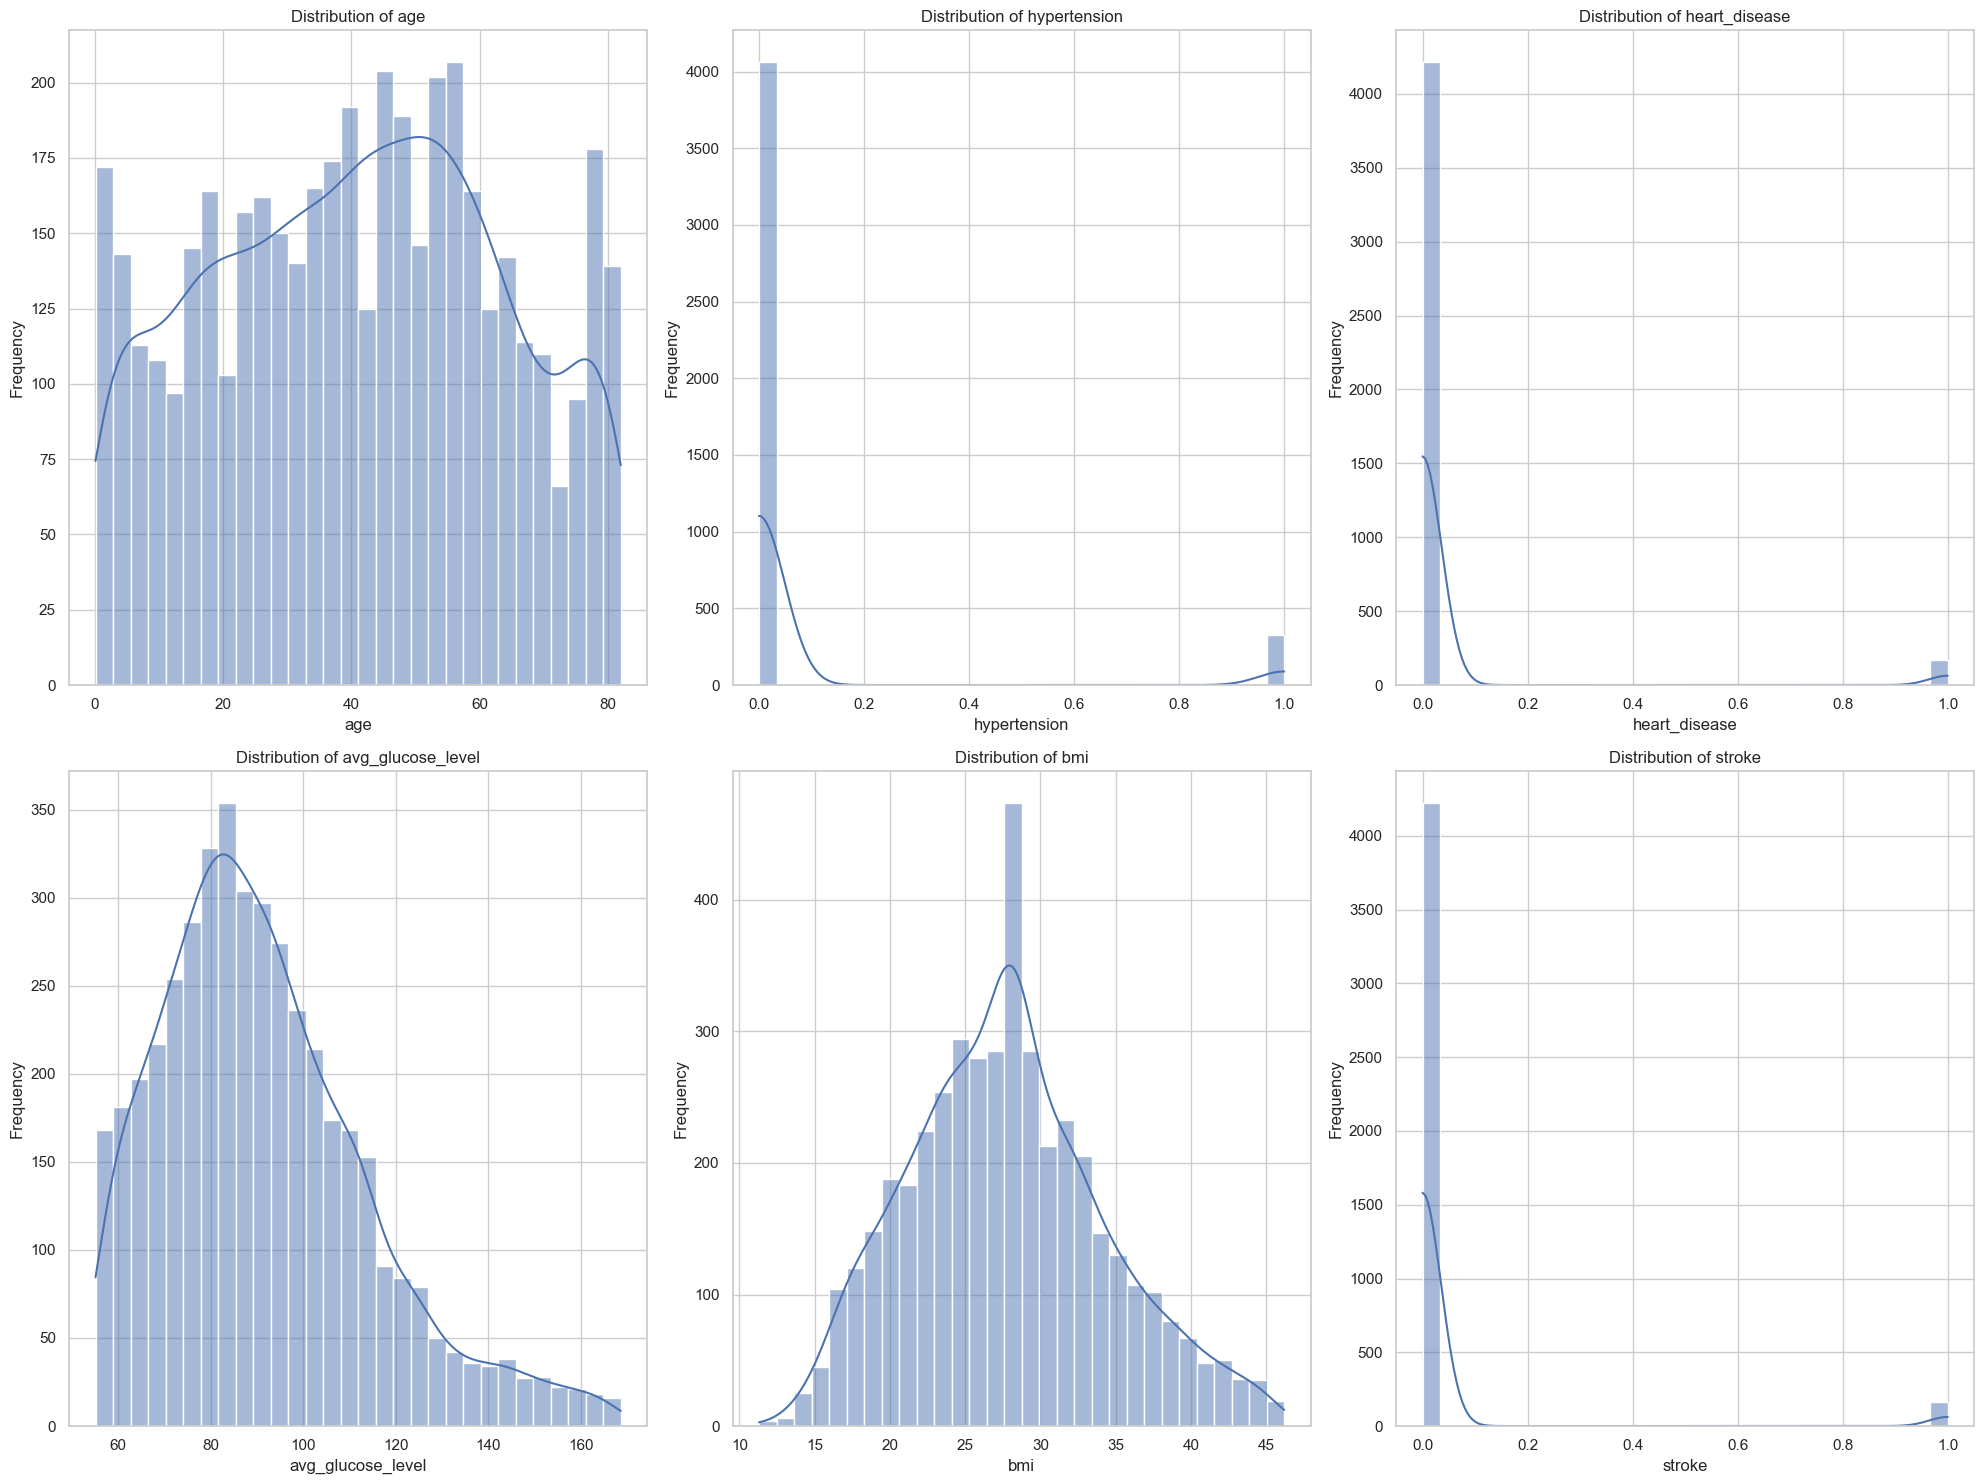

In [27]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create a list of numerical columns to visualize
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Create subplots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

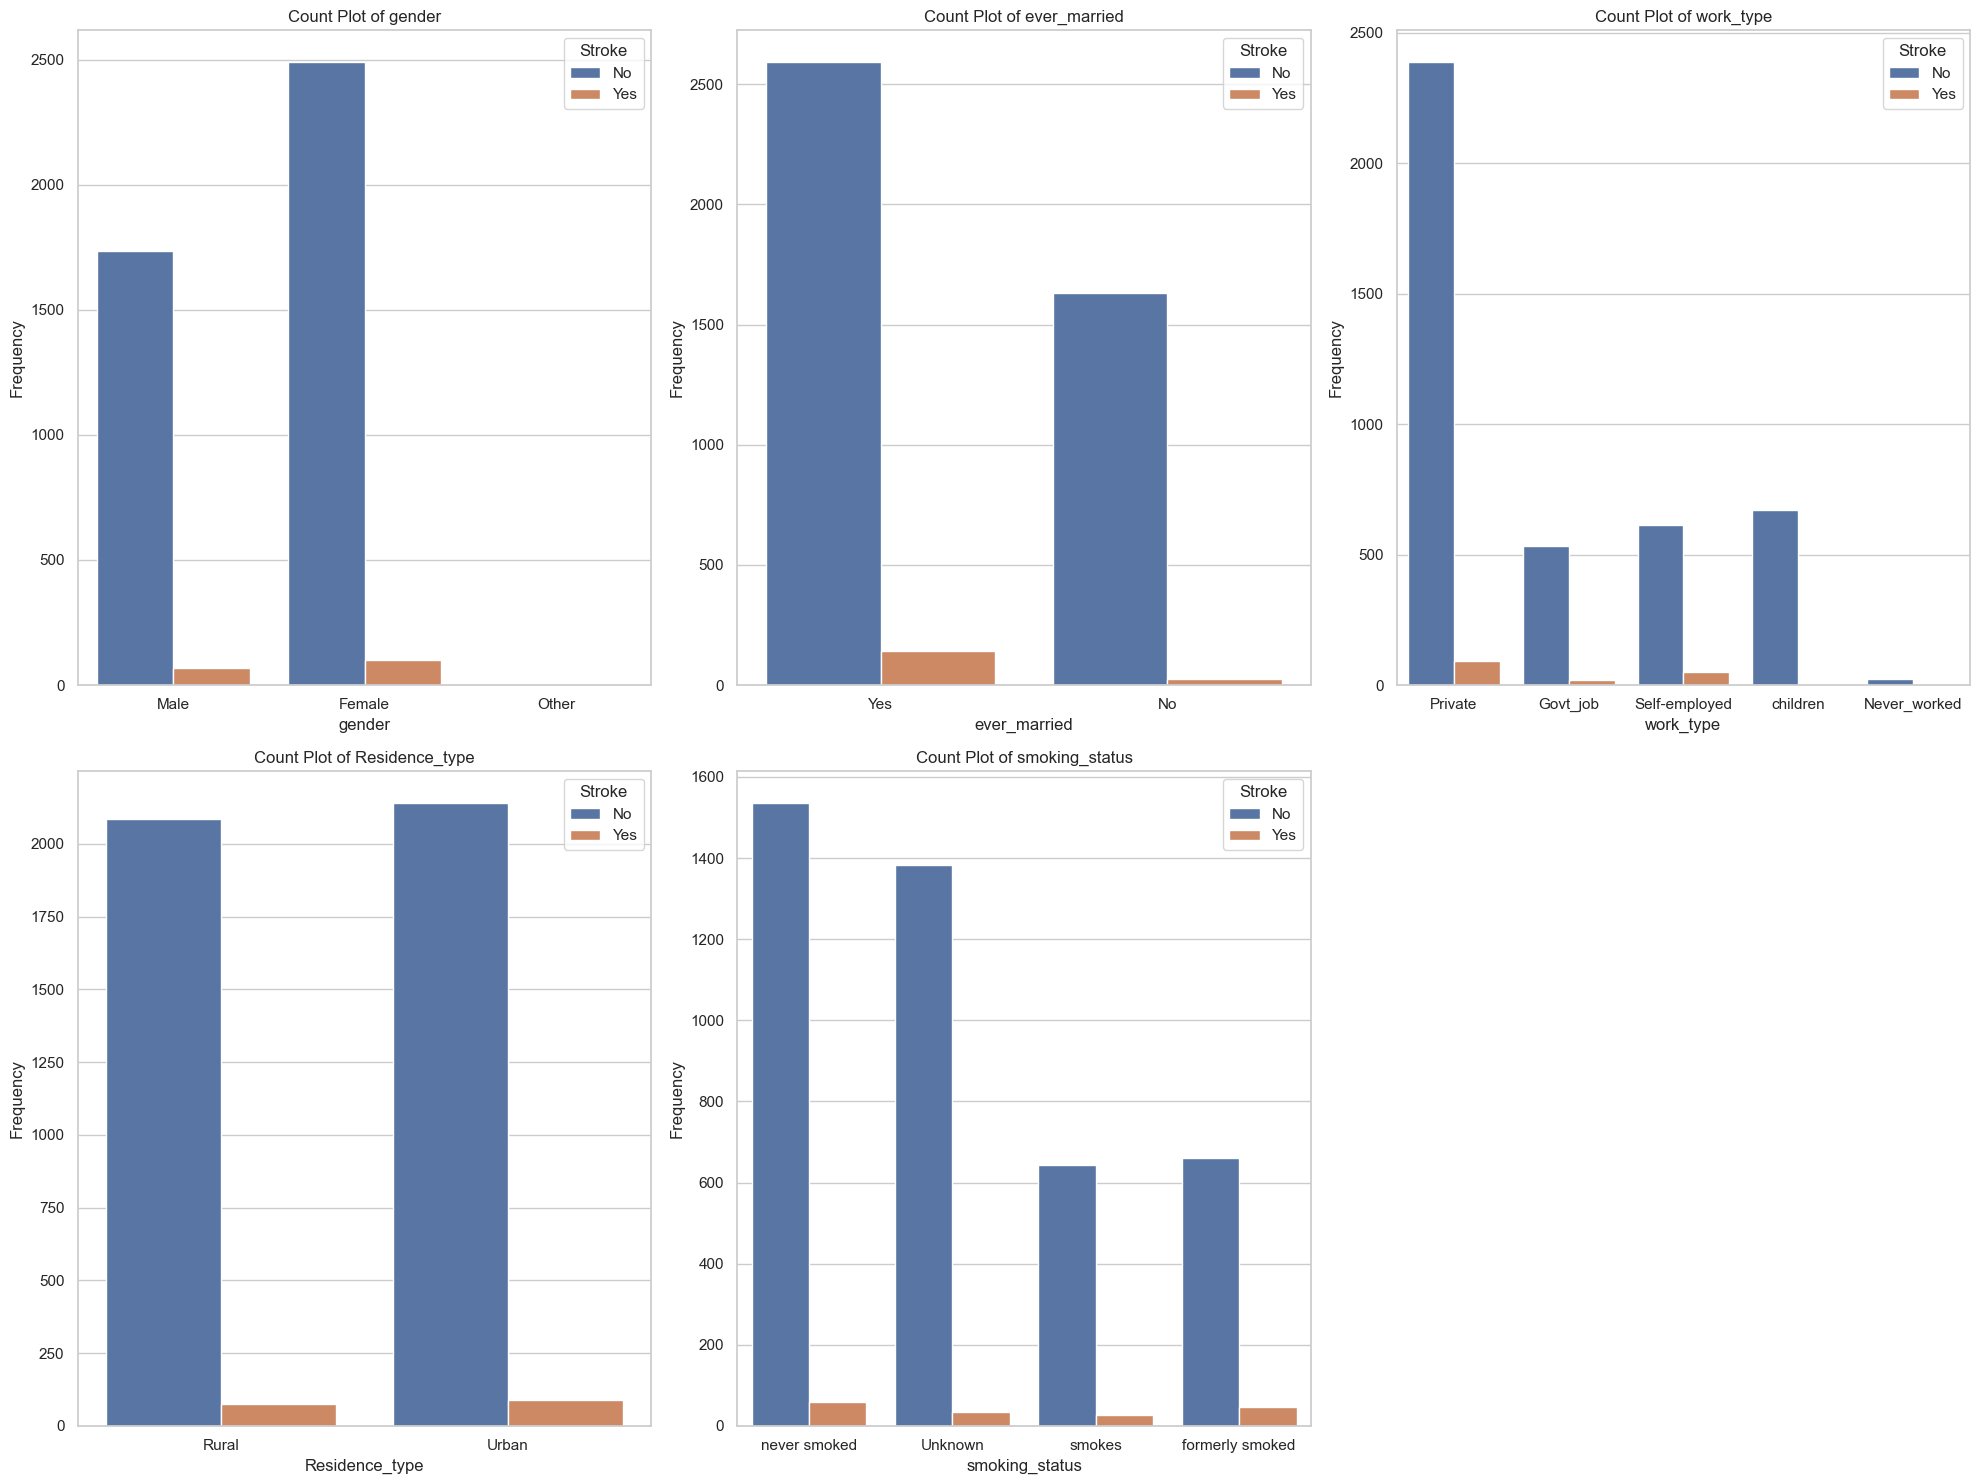

{'gender': gender
 Female    2590
 Male      1800
 Other        1
 Name: count, dtype: int64,
 'ever_married': ever_married
 Yes    2735
 No     1656
 Name: count, dtype: int64,
 'work_type': work_type
 Private          2482
 children          674
 Self-employed     661
 Govt_job          552
 Never_worked       22
 Name: count, dtype: int64,
 'Residence_type': Residence_type
 Urban    2230
 Rural    2161
 Name: count, dtype: int64,
 'smoking_status': smoking_status
 never smoked       1595
 Unknown            1418
 formerly smoked     708
 smokes              670
 Name: count, dtype: int64}

In [28]:
# Create a list of categorical columns to visualize
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create subplots for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='stroke')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Stroke', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

# Value counts for each categorical feature
value_counts = {col: df[col].value_counts() for col in categorical_cols}
value_counts

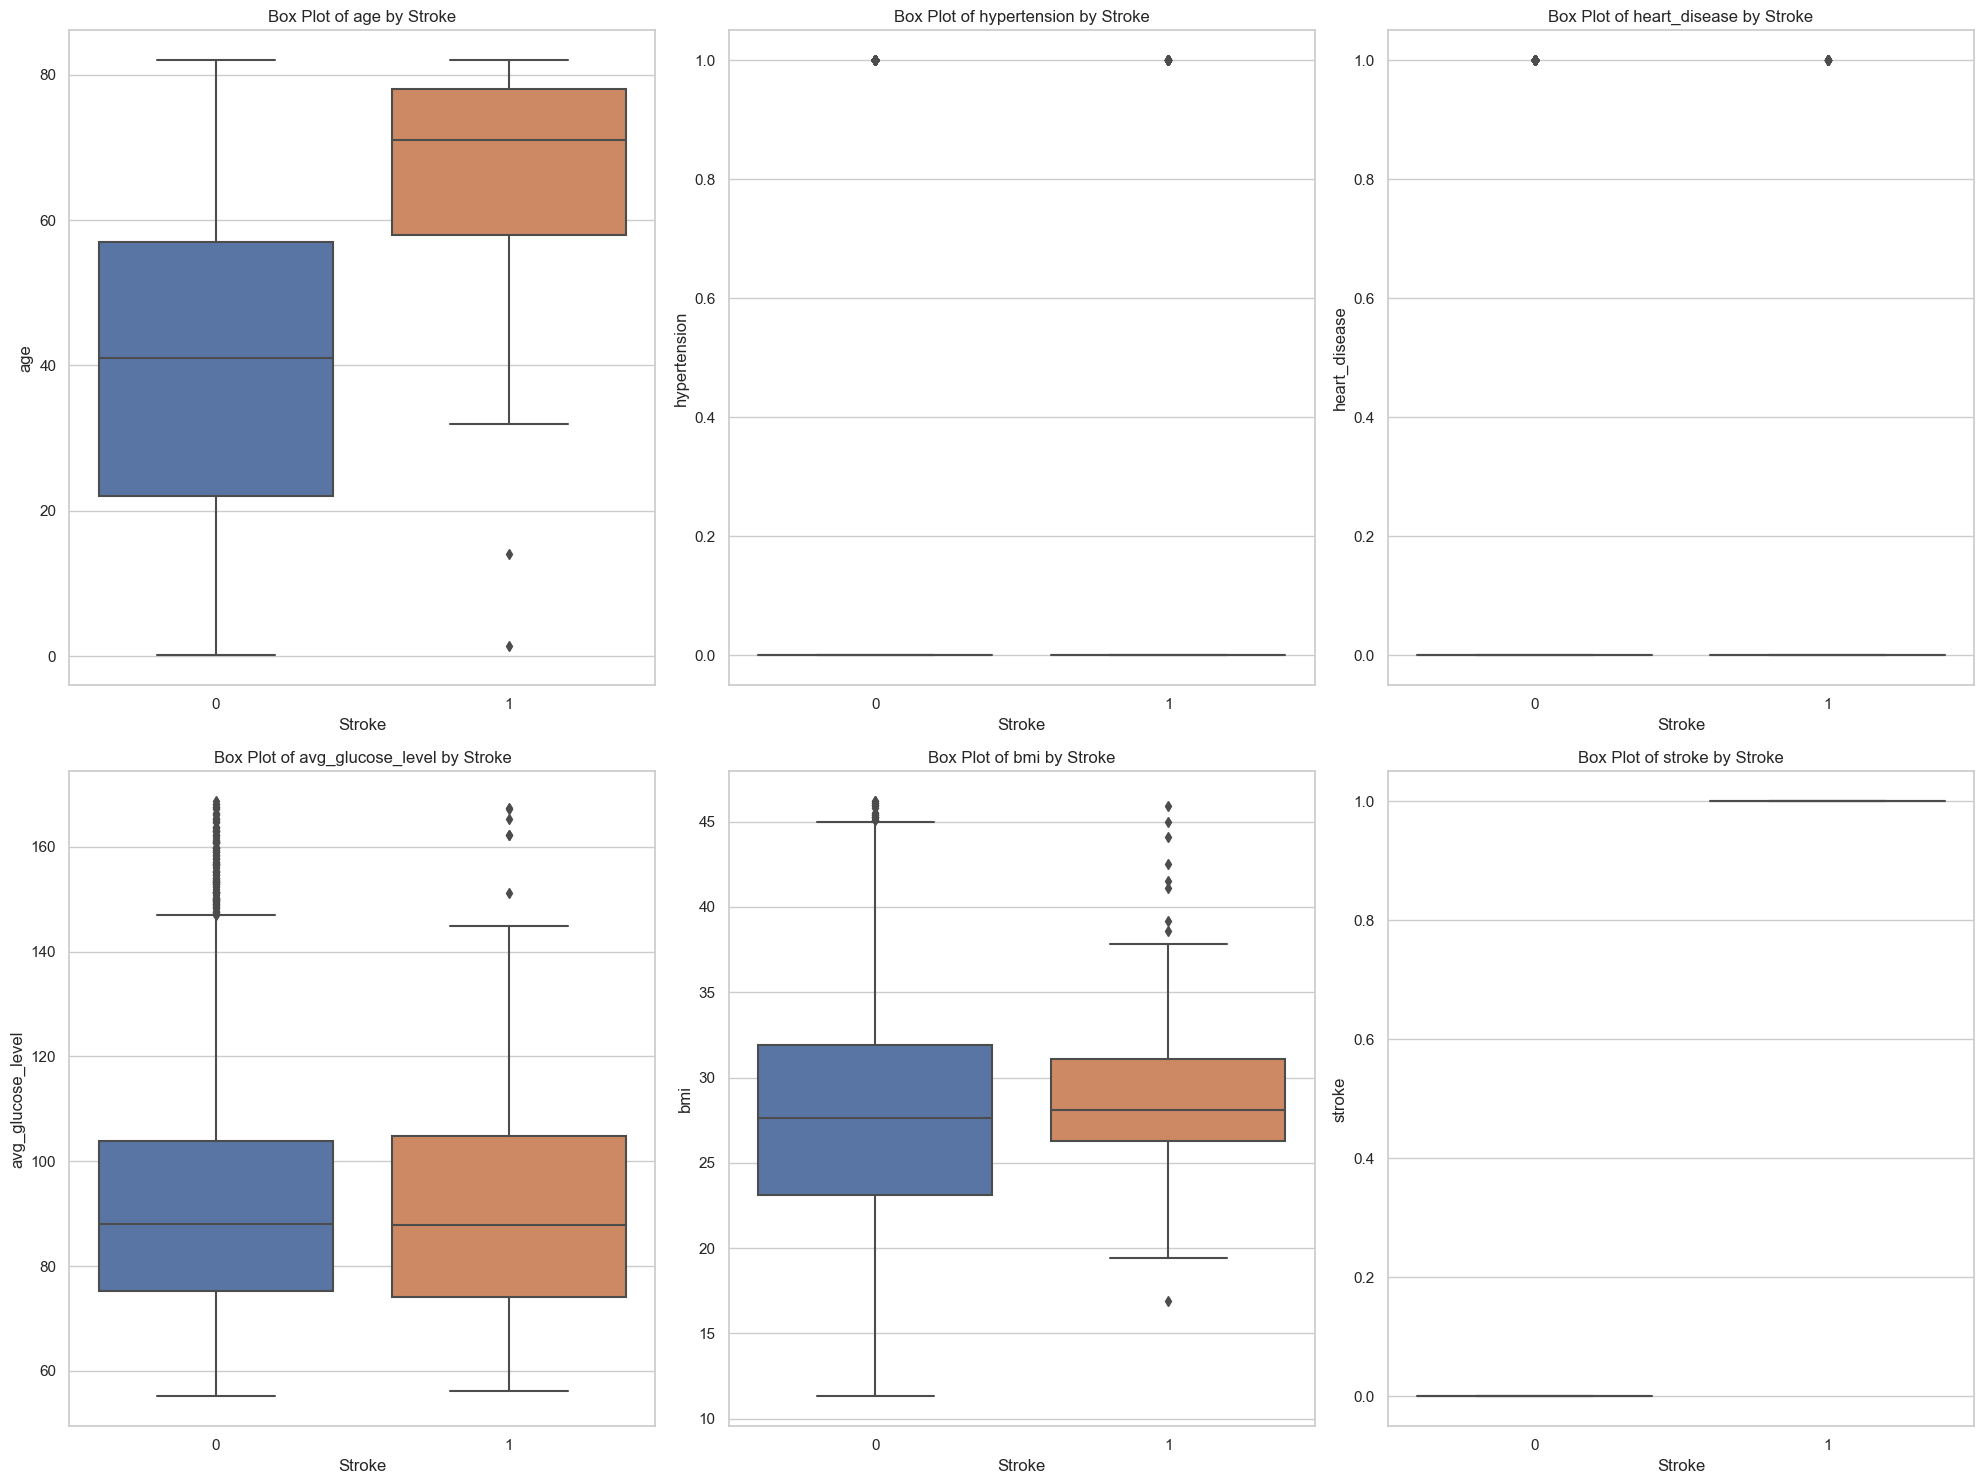

In [29]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# Create box plots for numerical columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'Box Plot of {col} by Stroke')
    plt.xlabel('Stroke')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Select categorical columns to encode
categorical_cols_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply LabelEncoder on categorical columns
for col in categorical_cols_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the dataframe to verify the encoding
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,28.1,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1


In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols_to_scale = ['age', 'avg_glucose_level', 'bmi']

# Apply scaling on numerical columns
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

# Display the first few rows of the dataframe to verify scaling
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,1.734716,0,1,1,2,0,0.637380,0.718712,2,1
6,1,1.468544,1,1,1,2,0,-0.943830,-0.058869,2,1
7,0,1.246733,0,0,0,2,1,0.128550,-0.760216,2,1
8,0,0.803113,0,0,1,2,0,-0.676397,0.047858,0,1
9,0,1.645992,0,0,1,2,1,-1.452218,-0.546762,0,1


<Axes: >

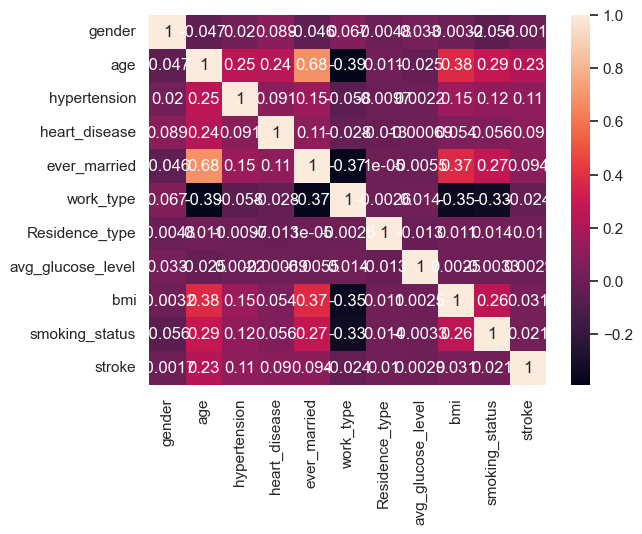

In [32]:
corr=df.corr()
sns.heatmap(corr, annot=True)

<Axes: title={'center': 'Count stroke status'}, xlabel='stroke'>

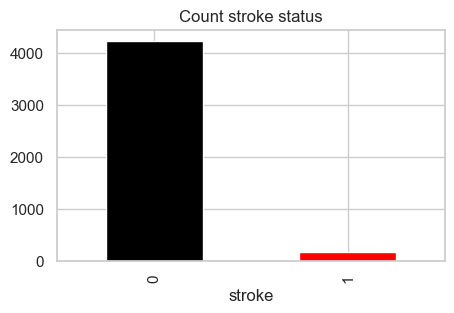

In [33]:
plt.figure(figsize=(5, 3))
df['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])

In [34]:
# Class count
count_class_0, count_class_1 = df['stroke'].value_counts()
# Divide by class
df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

Random under-sampling:
stroke
0    165
1    165
Name: count, dtype: int64
Shape of the new dataset is (330, 11)



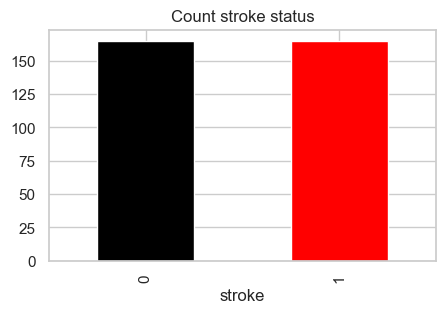

In [36]:
# Because our data is imbalance, we will randomly undersample our data
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['stroke'].value_counts())

plt.figure(figsize=(5, 3))
y = df_test_under['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])
print(f"Shape of the new dataset is {df_test_under.shape}\n")

Random under-sampling:
stroke
0    4226
1    4226
Name: count, dtype: int64
Shape of the new dataset is (8452, 11)



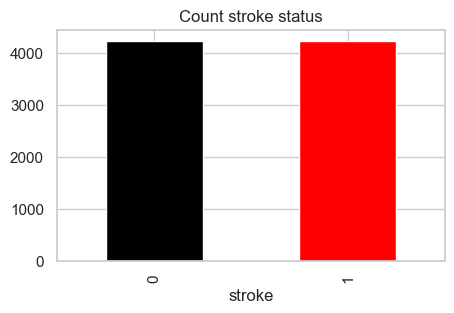

In [37]:
# Now we try oversample
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random under-sampling:')
print(df_test_over['stroke'].value_counts())

plt.figure(figsize=(5, 3))
y = df_test_over['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])
print(f"Shape of the new dataset is {df_test_over.shape}\n")

In [39]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

X = df_test_over.drop(columns='stroke')
y = df_test_over['stroke']

# Using stratify kFold
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 20, stratify = y)

In [41]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier,BaggingClassifier, StackingClassifier

In [42]:
smt=SMOTE()
X_train_resample,y_train_resample=smt.fit_resample(X_train,y_train)
print(X_train_resample.shape ,y_train_resample.shape)

(6762, 10) (6762,)


In [43]:
y_train_resample.value_counts().to_frame()

,count
stroke,
0,3381
1,3381


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)


accuracy_logistic, precision_logistic, recall_logistic, f1_logistic

(0.7746895328208161, 0.7557755775577558, 0.8120567375886525, 0.782905982905983)

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

accuracy_rf, precision_rf, recall_rf, f1_rf

(0.9964518036664696, 0.9929577464788732, 1.0, 0.9964664310954063)

In [46]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy_svc = accuracy_score(y_test, y_pred_rf)
precision_svc = precision_score(y_test, y_pred_rf)
recall_svc = recall_score(y_test, y_pred_rf)
f1_svc = f1_score(y_test, y_pred_rf)

accuracy_svc, precision_svc, recall_svc, f1_svc


(0.9964518036664696, 0.9929577464788732, 1.0, 0.9964664310954063)

In [47]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_rf)
precision_knn = precision_score(y_test, y_pred_rf)
recall_knn = recall_score(y_test, y_pred_rf)
f1_knn = f1_score(y_test, y_pred_rf)

accuracy_knn, precision_knn, recall_knn, f1_knn

(0.9964518036664696, 0.9929577464788732, 1.0, 0.9964664310954063)

In [48]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_rf)
precision_nb = precision_score(y_test, y_pred_rf)
recall_nb = recall_score(y_test, y_pred_rf)
f1_nb = f1_score(y_test, y_pred_rf)

accuracy_nb, precision_nb, recall_nb, f1_nb

(0.9964518036664696, 0.9929577464788732, 1.0, 0.9964664310954063)

In [49]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)

# Calculate evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred_rf)
precision_tree = precision_score(y_test, y_pred_rf)
recall_tree = recall_score(y_test, y_pred_rf)
f1_tree = f1_score(y_test, y_pred_rf)

accuracy_tree, precision_tree, recall_tree, f1_tree

(0.9964518036664696, 0.9929577464788732, 1.0, 0.9964664310954063)

In [50]:
# Create a DataFrame to store the metrics for each model
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVC','KNN','NB','Tree'],
    'Accuracy': [accuracy_logistic, accuracy_rf, accuracy_svc, accuracy_knn, accuracy_nb, accuracy_tree],
    'Precision': [precision_logistic, precision_rf, precision_svc, precision_knn, precision_nb, precision_tree],
    'Recall': [recall_logistic, recall_rf, recall_svc, recall_knn, recall_nb, recall_tree],
    'F1-Score': [f1_logistic, f1_rf, f1_svc, f1_knn, f1_nb, f1_tree]
})

# Display the metrics for comparison
metrics_df.sort_values(by='F1-Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
1,Random Forest,0.996452,0.992958,1.000000,0.996466
2,SVC,0.996452,0.992958,1.000000,0.996466
3,KNN,0.996452,0.992958,1.000000,0.996466
4,NB,0.996452,0.992958,1.000000,0.996466
5,Tree,0.996452,0.992958,1.000000,0.996466
0,Logistic Regression,0.774690,0.755776,0.812057,0.782906


In [51]:
LR = LogisticRegression()
rf= RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=2)
nb = GaussianNB()
tree = DecisionTreeClassifier()

In [52]:
rf_model = RandomForestClassifier(n_estimators=150,criterion='entropy',random_state = 123)
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=123)

In [53]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9958604376108812

In [54]:
bagging = BaggingClassifier(
    estimator = knn,
    n_estimators = 10
)


bagging.fit(X_train , y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=2))

In [55]:
y_pred = bagging.predict(X_test)
accuracy_score(y_test,y_pred)

0.9757539917208752

In [56]:
base_models = [('SVM',SVC()),('Decision Tree',DecisionTreeClassifier()),('Logistic Regerssion',LogisticRegression()) , ('KNN',KNeighborsClassifier(n_neighbors=2))]
stacking = StackingClassifier(
    estimators = base_models , 
    final_estimator = LogisticRegression(),
    cv = 5
)

stacking.fit(X_train , y_train)

StackingClassifier(cv=5,
                   estimators=[('SVM', SVC()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Logistic Regerssion', LogisticRegression()),
                               ('KNN', KNeighborsClassifier(n_neighbors=2))],
                   final_estimator=LogisticRegression())

In [57]:
y_pred = stacking.predict(X_test)
accuracy_score(y_test,y_pred)

0.9929036073329391

In [58]:
models = [('SVM',svm),('Decision Tree',tree),('Logistic Regerssion',LR) , ('KNN',knn)]

voting_model = VotingClassifier(
    estimators= models
)

In [59]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM', SVC()),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('Logistic Regerssion', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=2))])

In [60]:
y_pred = voting_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.937906564163217